# Import Packages

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix 
from mlxtend.plotting import plot_decision_regions

# Load Data

In [2]:
# I'm direclty loading the data that I already downloaded from the Spotify API
# If you would like to retrieve the data by yourself, 
# follow the data retrival section below
df100 = pd.read_csv("tracks100.csv")
df200 = pd.read_csv("tracks200.csv")
df300 = pd.read_csv("tracks300.csv")

## Data Retrieval

In [ ]:
# Authorization
CLIENT_ID = "insert_your_client_id"
CLIENT_SECRET = "insert_your_client_secret"

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
# Source: https://www.linkedin.com/pulse/extracting-your-fav-playlist-info-spotifys-api-samantha-jones/ 

def call_playlist(creator, playlist_id):

    #step1

    playlist_features_list = ["artist", "album", "track_name", "track_id", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "tempo", "valence"]

    playlist_df = pd.DataFrame(columns = playlist_features_list)

    #step2

    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}

        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]

        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3

    return playlist_df

In [ ]:
# df100 = call_playlist("K","4CM57pkIBqTlrIcarW8OUW")
# df100

In [ ]:
# df100.to_csv("tracks100.csv")

In [ ]:
# df200 = call_playlist("K", "1Rotcm3NfqrGBmegazDIR6")
# df200

In [ ]:
# df200.to_csv("tracks200.csv")

In [ ]:
# df300 = call_playlist("K", "1NtsZll8ZJlgftbyIMhGpD")
# df300

In [ ]:
# df300.to_csv("tracks300.csv")

## Prepare the Dataset

In [3]:
raw_input = pd.read_csv("tracks.csv")
my_input = raw_input[["track_id", "timing"]]
my_input

,track_id,timing
0,204t5SErksNRHRhU52g5JF,1
1,1w327AHTCoChRIkJUprAnV,1
2,39iczvfNkZstM8KY8dNDFC,0
3,3s9YtjSkxeeriM92mASyoO,0
4,6cSkQRxoJt6FHGrWVIGDTJ,1
...,...,...
295,5M6q2VBF4KLF961xGLPFw9,0
296,1gB9Hvz050IuA28oxXtydl,0
297,3ljvffjEqf4o0gvOcvxF4O,0
298,3U987lHXBgataMkhfi7YAL,0


In [4]:
spotify_input = pd.concat([df100, df200, df300], ignore_index=True, axis = 0)
spotify_input

,Unnamed: 0,artist,album,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,valence
0,0,Men I Trust,Oncle Jazz,Oncle Jazz,204t5SErksNRHRhU52g5JF,0.535,0.712,0.3080,0.816,0.0813,-16.776,139.995,0.246
1,1,Orion Sun,A Collection of Fleeting Moments and Daydreams,Mirage,1w327AHTCoChRIkJUprAnV,0.870,0.683,0.4680,0.673,0.1080,-10.058,117.095,0.470
2,2,salvia palth,melanchole,(dream),39iczvfNkZstM8KY8dNDFC,0.926,0.328,0.3010,0.825,0.1180,-13.283,147.398,0.167
3,3,Vansire,Angel Youth,Précis,3s9YtjSkxeeriM92mASyoO,0.960,0.532,0.3480,0.757,0.1030,-13.284,80.998,0.301
4,4,Luna Li,jams EP,cloud castle,6cSkQRxoJt6FHGrWVIGDTJ,0.040,0.556,0.5630,0.900,0.2450,-6.731,83.900,0.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,95,Constance Lucas,Open to return,Open to return,5M6q2VBF4KLF961xGLPFw9,0.994,0.429,0.0542,0.928,0.1050,-28.538,72.862,0.142
296,96,Minik Jakobsen,Before We Met,Before We Met,1gB9Hvz050IuA28oxXtydl,0.995,0.354,0.0297,0.947,0.1100,-28.069,79.894,0.275
297,97,Hans Bukowski,Everyday,Everyday,3ljvffjEqf4o0gvOcvxF4O,0.989,0.460,0.0375,0.861,0.1020,-33.391,81.383,0.442
298,98,Ben Crosland,Lullaby,Lullaby,3U987lHXBgataMkhfi7YAL,0.992,0.381,0.0242,0.920,0.1030,-27.867,65.712,0.346


In [5]:
tracks_raw = pd.merge(my_input, spotify_input, on="track_id", how="left")
tracks_raw

,track_id,timing,Unnamed: 0,artist,album,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,valence
0,204t5SErksNRHRhU52g5JF,1,0,Men I Trust,Oncle Jazz,Oncle Jazz,0.535,0.712,0.3080,0.816,0.0813,-16.776,139.995,0.246
1,1w327AHTCoChRIkJUprAnV,1,1,Orion Sun,A Collection of Fleeting Moments and Daydreams,Mirage,0.870,0.683,0.4680,0.673,0.1080,-10.058,117.095,0.470
2,39iczvfNkZstM8KY8dNDFC,0,2,salvia palth,melanchole,(dream),0.926,0.328,0.3010,0.825,0.1180,-13.283,147.398,0.167
3,3s9YtjSkxeeriM92mASyoO,0,3,Vansire,Angel Youth,Précis,0.960,0.532,0.3480,0.757,0.1030,-13.284,80.998,0.301
4,6cSkQRxoJt6FHGrWVIGDTJ,1,4,Luna Li,jams EP,cloud castle,0.040,0.556,0.5630,0.900,0.2450,-6.731,83.900,0.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,5M6q2VBF4KLF961xGLPFw9,0,95,Constance Lucas,Open to return,Open to return,0.994,0.429,0.0542,0.928,0.1050,-28.538,72.862,0.142
298,1gB9Hvz050IuA28oxXtydl,0,96,Minik Jakobsen,Before We Met,Before We Met,0.995,0.354,0.0297,0.947,0.1100,-28.069,79.894,0.275
299,3ljvffjEqf4o0gvOcvxF4O,0,97,Hans Bukowski,Everyday,Everyday,0.989,0.460,0.0375,0.861,0.1020,-33.391,81.383,0.442
300,3U987lHXBgataMkhfi7YAL,0,98,Ben Crosland,Lullaby,Lullaby,0.992,0.381,0.0242,0.920,0.1030,-27.867,65.712,0.346


In [6]:
tracks = tracks_raw.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
tracks = tracks.drop(columns=["Unnamed: 0"])
tracks

,track_id,timing,artist,album,track_name,acousticness,danceability,energy,instrumentalness,liveness,loudness,tempo,valence
0,204t5SErksNRHRhU52g5JF,1,Men I Trust,Oncle Jazz,Oncle Jazz,0.535,0.712,0.3080,0.816,0.0813,-16.776,139.995,0.246
1,1w327AHTCoChRIkJUprAnV,1,Orion Sun,A Collection of Fleeting Moments and Daydreams,Mirage,0.870,0.683,0.4680,0.673,0.1080,-10.058,117.095,0.470
2,39iczvfNkZstM8KY8dNDFC,0,salvia palth,melanchole,(dream),0.926,0.328,0.3010,0.825,0.1180,-13.283,147.398,0.167
3,3s9YtjSkxeeriM92mASyoO,0,Vansire,Angel Youth,Précis,0.960,0.532,0.3480,0.757,0.1030,-13.284,80.998,0.301
4,6cSkQRxoJt6FHGrWVIGDTJ,1,Luna Li,jams EP,cloud castle,0.040,0.556,0.5630,0.900,0.2450,-6.731,83.900,0.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5M6q2VBF4KLF961xGLPFw9,0,Constance Lucas,Open to return,Open to return,0.994,0.429,0.0542,0.928,0.1050,-28.538,72.862,0.142
296,1gB9Hvz050IuA28oxXtydl,0,Minik Jakobsen,Before We Met,Before We Met,0.995,0.354,0.0297,0.947,0.1100,-28.069,79.894,0.275
297,3ljvffjEqf4o0gvOcvxF4O,0,Hans Bukowski,Everyday,Everyday,0.989,0.460,0.0375,0.861,0.1020,-33.391,81.383,0.442
298,3U987lHXBgataMkhfi7YAL,0,Ben Crosland,Lullaby,Lullaby,0.992,0.381,0.0242,0.920,0.1030,-27.867,65.712,0.346


# Data Visualization

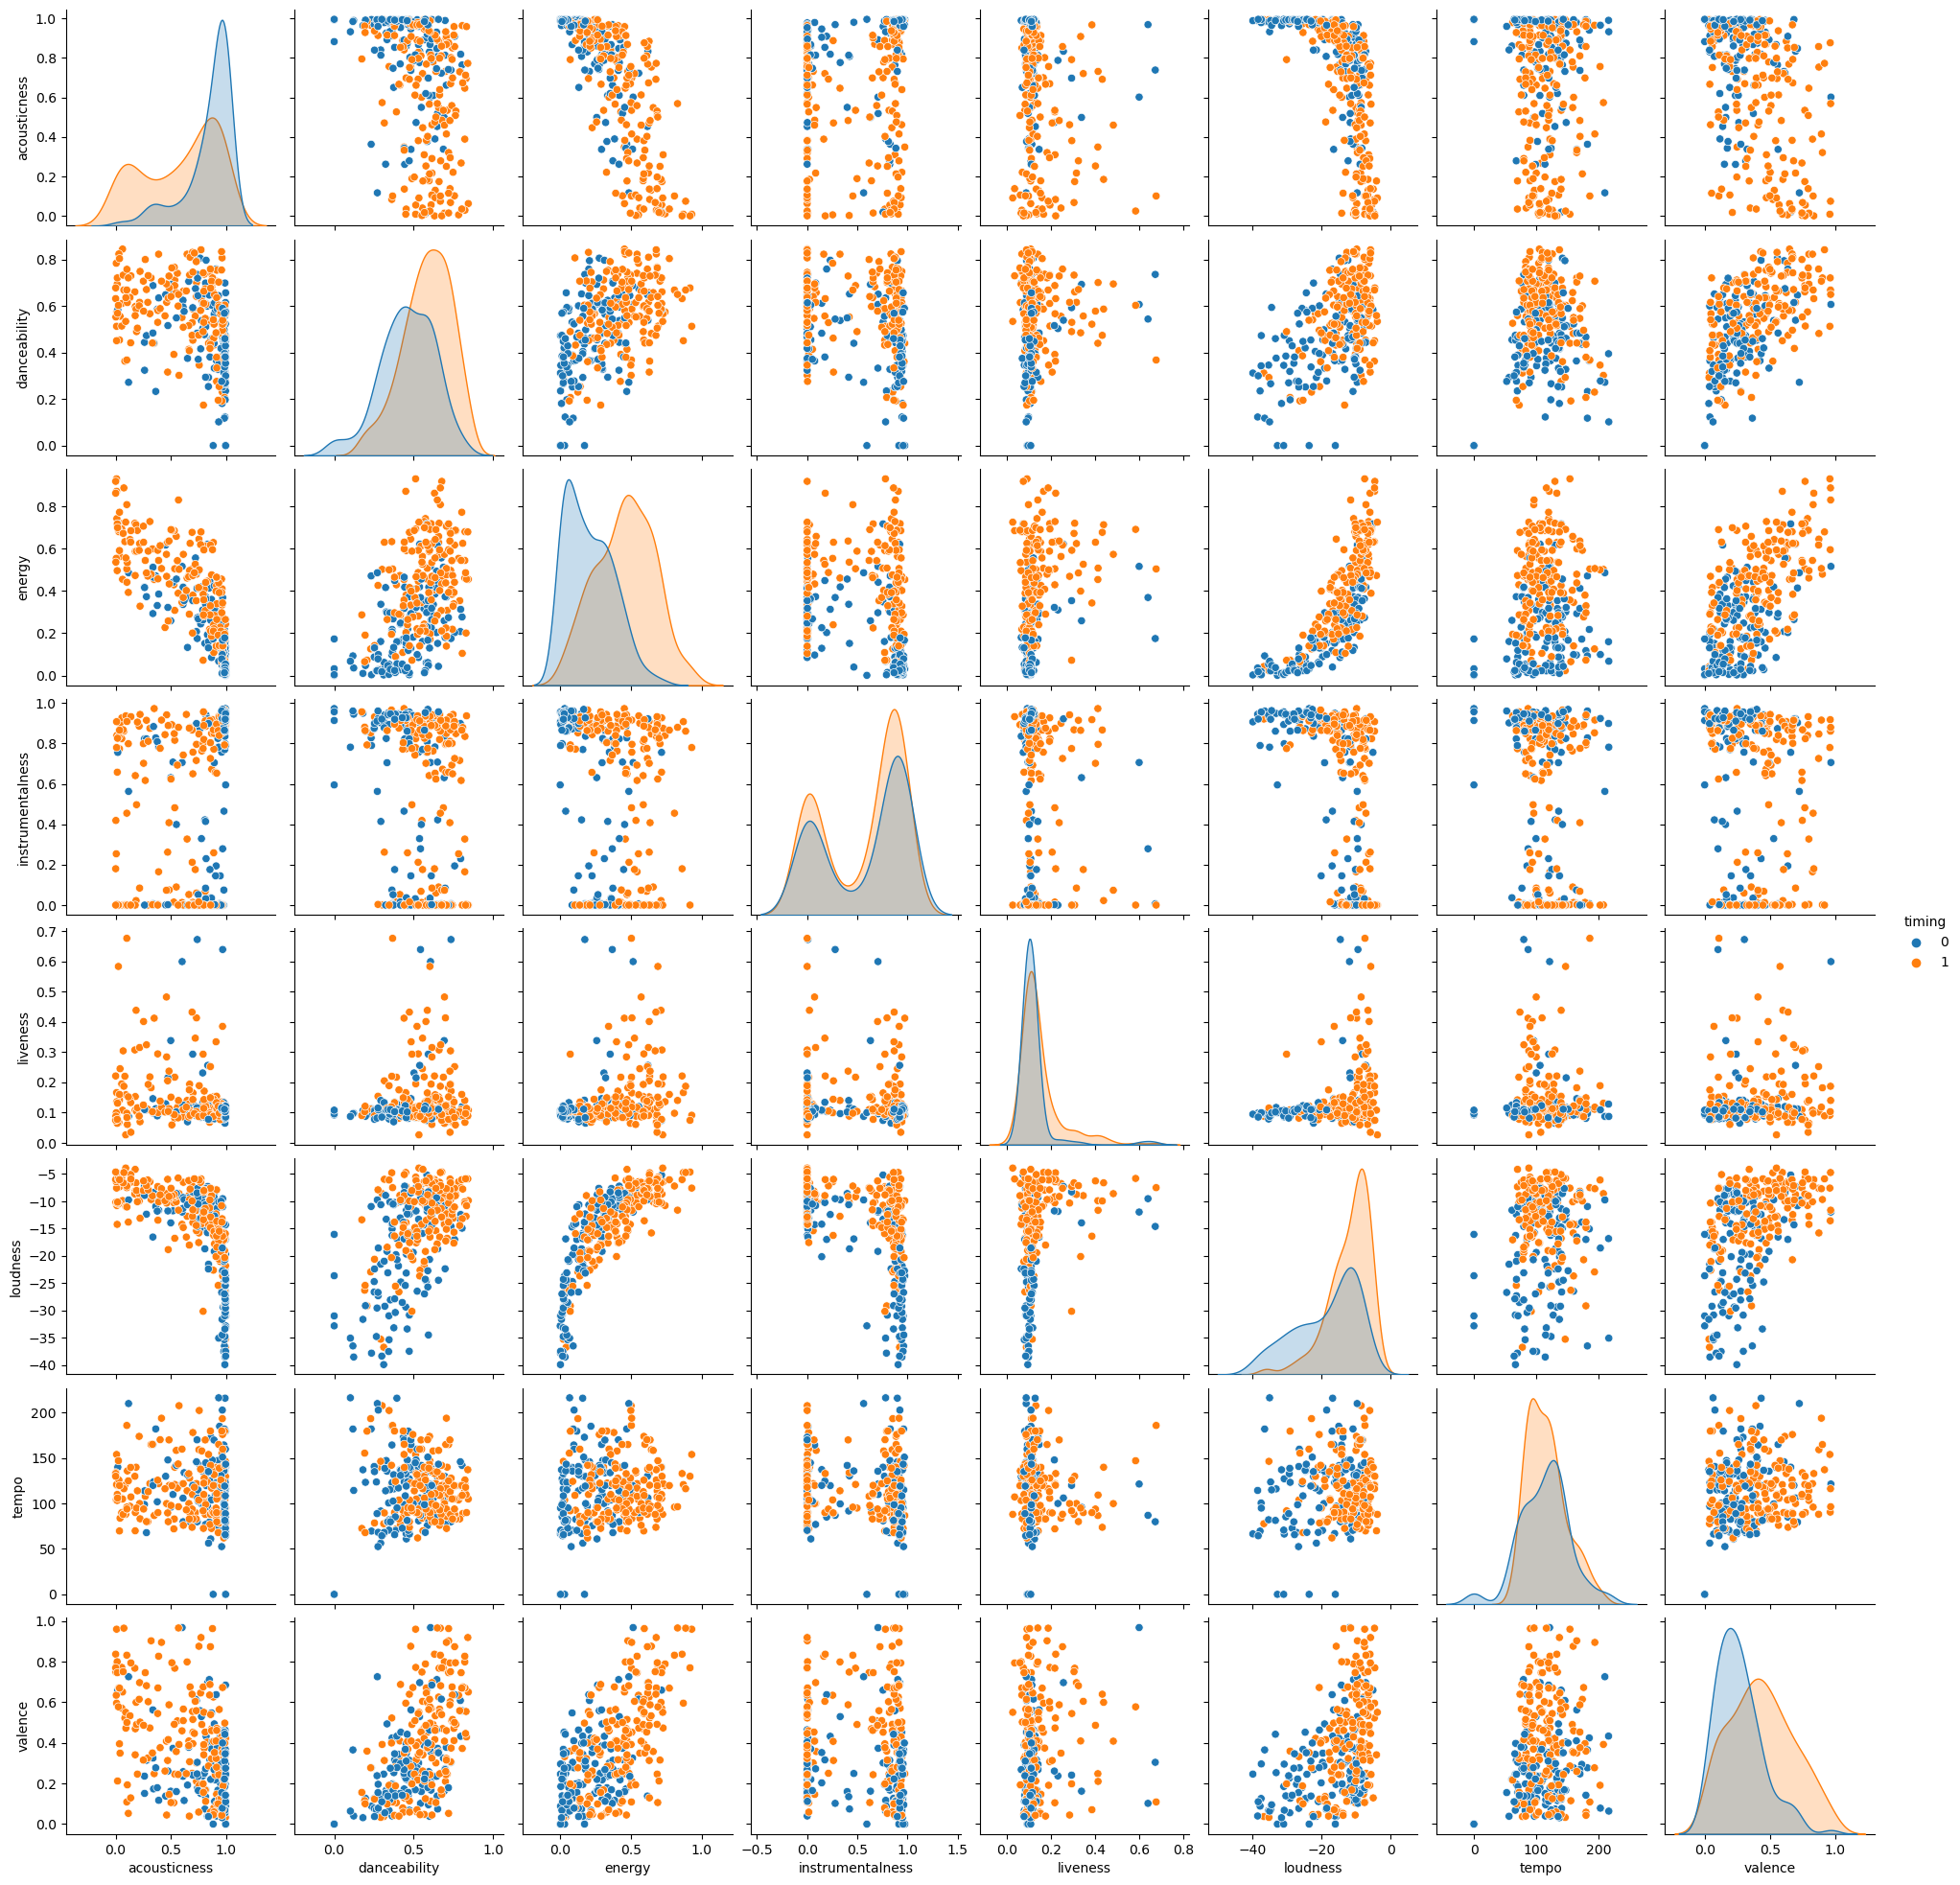

In [7]:
# Source: https://pub.towardsai.net/support-vector-machine-svm-for-binary-and-multiclass-classification-hands-on-with-scikit-learn-29cdbe5cb90e
sns.pairplot(tracks, kind="scatter", hue="timing")
plt.show()

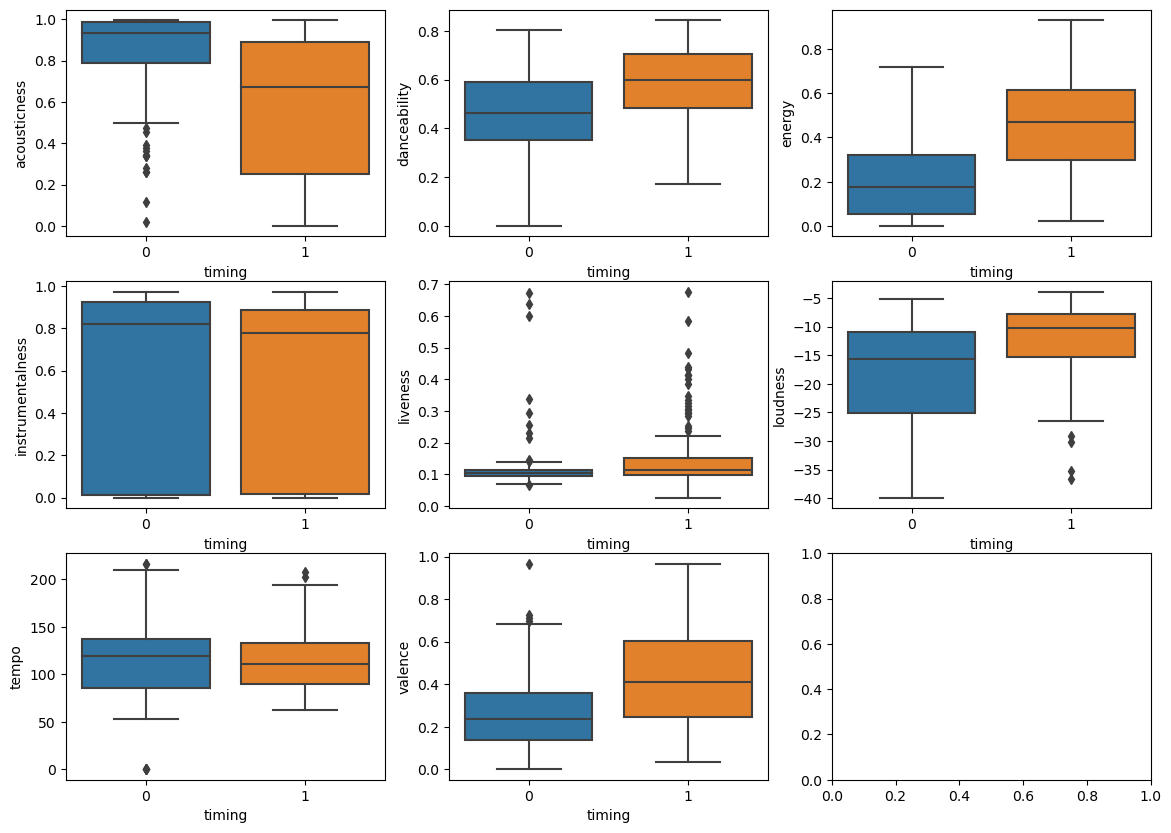

In [8]:
# "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "tempo", "valence"]
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
sns.boxplot(x=tracks["timing"], y=tracks["acousticness"], ax=axs[0, 0])
sns.boxplot(x=tracks["timing"], y=tracks["danceability"], ax=axs[0, 1])
sns.boxplot(x=tracks["timing"], y=tracks["energy"], ax=axs[0, 2])
sns.boxplot(x=tracks["timing"], y=tracks["instrumentalness"], ax=axs[1, 0])
sns.boxplot(x=tracks["timing"], y=tracks["liveness"],ax=axs[1, 1])
sns.boxplot(x=tracks["timing"], y=tracks["loudness"], ax=axs[1, 2] )
sns.boxplot(x=tracks["timing"], y=tracks["tempo"], ax=axs[2, 0])
sns.boxplot(x=tracks["timing"], y=tracks["valence"], ax=axs[2, 1])
plt.show()

# Build the Model & Evaluations

In [9]:
## Scenario 1
# X = tracks.drop(columns=["timing", "artist", "album", "track_name", "track_id"])

## Scenario 2
# X = tracks.drop(columns=["timing", "artist", "album", "track_name", "track_id", "acousticness", "instrumentalness", "liveness", "tempo"])

# Scenario 3
X = tracks.drop(columns=["timing", "artist", "album", "track_name", "track_id", "acousticness", "instrumentalness", "liveness", "tempo", "danceability", "valence"])

## Scenario 4
# X = tracks.drop(columns=["timing", "artist", "album", "track_name", "track_id", "acousticness", "instrumentalness", "liveness", "tempo", "danceability", "valence", "loudness"])

## Scenario 5
# X = tracks.drop(columns=["timing", "artist", "album", "track_name", "track_id", "acousticness", "instrumentalness", "liveness", "tempo", "danceability", "valence", "energy"])

y = tracks["timing"]
X

,energy,loudness
0,0.3080,-16.776
1,0.4680,-10.058
2,0.3010,-13.283
3,0.3480,-13.284
4,0.5630,-6.731
...,...,...
295,0.0542,-28.538
296,0.0297,-28.069
297,0.0375,-33.391
298,0.0242,-27.867


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
LinearSVM = LinearSVC().fit(X_train, y_train)

print("training set score: %f" % LinearSVM.score(X_train, y_train))
print("test set score: %f" % LinearSVM.score(X_test, y_test))

training set score: 0.750000
test set score: 0.816667


/Users/lei/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
predictions = LinearSVM.predict(X_test) 
print(classification_report(y_test, predictions)) 
print(confusion_matrix(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.91      0.78      0.84        37

    accuracy                           0.82        60
   macro avg       0.81      0.83      0.81        60
weighted avg       0.83      0.82      0.82        60

[[20  3]
 [ 8 29]]


In [13]:
#C=100
LinearSVM100 = LinearSVC(C=100).fit(X_train, y_train)

print("training set score: %f" % LinearSVM100.score(X_train, y_train))
print("test set score: %f" % LinearSVM100.score(X_test, y_test))

training set score: 0.550000
test set score: 0.583333


/Users/lei/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
#C=0.01
LinearSVM001 = LinearSVC(C=0.01).fit(X_train, y_train)

print("training set score: %f" % LinearSVM001.score(X_train, y_train))
print("test set score: %f" % LinearSVM001.score(X_test, y_test))

training set score: 0.654167
test set score: 0.783333


In [15]:
data = tracks

def LinearSVM_comparison(data,c):
    x = data[['energy','loudness']].values
    y = data['timing'].astype(int).values
    LinearSVM_plot = LinearSVC(C=c)
    LinearSVM_plot.fit(x,y)
    print(LinearSVM_plot.score(x,y))
    #Plot decision region:
    plot_decision_regions(x,y, clf=LinearSVM_plot, legend=2)
    #Adding axes annotations:
    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title('Linear SVM with C='+str(c))
    plt.show()

0.7433333333333333


/Users/lei/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


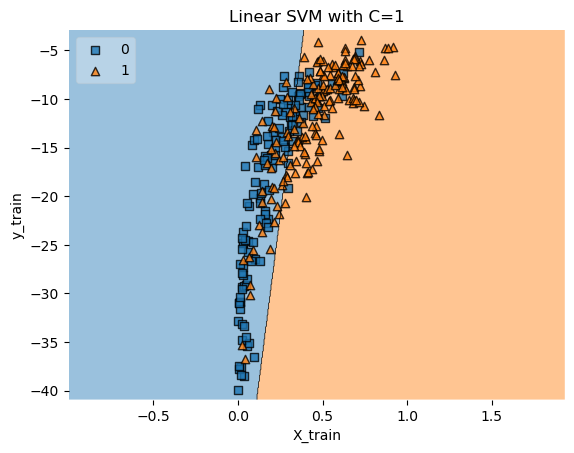

In [16]:
LinearSVM_comparison(data,1)